# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read Source Datasets

## Train

In [3]:
pd_train = pd.read_csv("../input/train.csv", index_col='PassengerId')

In [4]:
display(pd_train.info())
pd_train.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


None

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S


## Test

In [5]:
pd_test = pd.read_csv("../input/test.csv", index_col='PassengerId')

In [6]:
display(pd_test.info())
pd_test.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 100000 to 199999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Pclass    100000 non-null  int64  
 1   Name      100000 non-null  object 
 2   Sex       100000 non-null  object 
 3   Age       96513 non-null   float64
 4   SibSp     100000 non-null  int64  
 5   Parch     100000 non-null  int64  
 6   Ticket    94819 non-null   object 
 7   Fare      99867 non-null   float64
 8   Cabin     29169 non-null   object 
 9   Embarked  99723 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 8.4+ MB


None

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


# Create Clean Dataset

In [14]:
# Utilities
def ticket_converter(x):
    c, n = '', ''
    x = str(x).replace('.', '').replace('/','').replace(' ', '')
    for i in x:
        if i.isnumeric():
            n += i
        else :
            c += i 
    if n != '':
        return c, int(n)
    return c, np.nan


def create_ticket_type(pd_df):
    return pd_df.assign(ticket_type=pd_df['Ticket'].apply(lambda x: ticket_converter(x)[0]))


def create_ticket_num(pd_df):
    return pd_df.assign(ticket_num=pd_df['Ticket'].apply(lambda x: ticket_converter(x)[1]))


def create_family(pd_df):
    return pd_df.assign(family=pd_df.Parch + pd_df.SibSp)


def create_cabin_id(pd_df):
    return pd_df.assign(cabin_id=pd_df.Cabin.map(lambda x: str(x)[0].strip()))


def create_surname(pd_df):
    return pd_df.assign(surname=pd_df.Name.map(lambda x: x.split(',')[0]))


def create_age_bin(pd_df):
    return pd_df.assign(age_bin=pd.cut(
        x=pd_df.Age, 
        bins=[-np.inf, 20, 40, 60, 80, np.inf],
        labels=[1, 2, 3, 4, 5],
        right=False))

In [15]:
pd_train_clean = (pd_train
    .pipe(create_family)
    .pipe(create_ticket_type)
    .pipe(create_ticket_num)
    .pipe(create_cabin_id)
    .pipe(create_surname)
    .pipe(create_age_bin))
pd_test_clean = (pd_test
    .pipe(create_family)
    .pipe(create_ticket_type)
    .pipe(create_ticket_num)
    .pipe(create_cabin_id)
    .pipe(create_surname)
    .pipe(create_age_bin))

In [16]:
# Save
pd_train_clean.to_csv("./data/clean/train.csv")
pd_test_clean.to_csv("./data/clean/test.csv")

In [17]:
# Read
pd_train_clean = pd.read_csv("./data/clean/train.csv", index_col='PassengerId')
pd_test_clean = pd.read_csv("./data/clean/test.csv", index_col='PassengerId')

In [18]:
# Display 
display(pd_train_clean.info())
pd_train_clean.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Survived     100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Name         100000 non-null  object 
 3   Sex          100000 non-null  object 
 4   Age          96708 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Ticket       95377 non-null   object 
 8   Fare         99866 non-null   float64
 9   Cabin        32134 non-null   object 
 10  Embarked     99750 non-null   object 
 11  family       100000 non-null  int64  
 12  ticket_type  24655 non-null   object 
 13  ticket_num   94704 non-null   float64
 14  cabin_id     100000 non-null  object 
 15  surname      100000 non-null  object 
 16  age_bin      96708 non-null   float64
dtypes: float64(4), int64(5), object(8)
memory usage: 13.7+ MB


None

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,ticket_type,ticket_num,cabin_id,surname,age_bin
PassengerId,,,,,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,2,NaN,209245.0,C,Oconnor,NaN
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,0,NaN,27323.0,n,Bryan,NaN
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,3,CA,457703.0,n,Owens,1.0
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,0,A,10866.0,n,Kramer,1.0
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,0,NaN,427635.0,n,Bond,2.0


# Analyze Clean Dataset

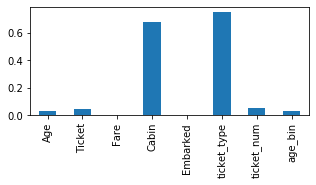

In [19]:
# Null Ratios
ratios = pd_train_clean.isnull().sum() / pd_train_clean.shape[0]
(ratios[ratios > 0]).plot(kind='bar', figsize=(5, 2))
plt.show()

In [20]:
pd_train_clean.nunique().sort_values(ascending=False)

Name           92144
Ticket         75331
ticket_num     66530
Cabin          26992
surname        21558
Fare           15935
Age              173
ticket_type       30
family            16
cabin_id           9
Parch              8
SibSp              7
age_bin            5
Embarked           3
Pclass             3
Sex                2
Survived           2
dtype: int64

In [37]:
pd_train_clean.Survived.mean()

0.42774

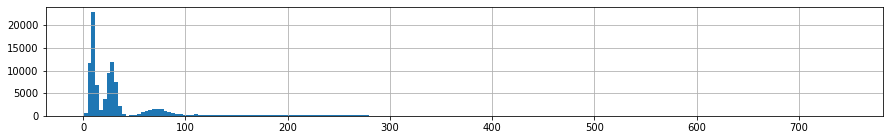

In [42]:
pd_train_clean.Fare.hist(bins=200, figsize=(15, 2))
plt.show()

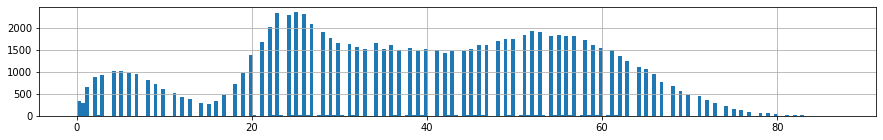

In [34]:
pd_train_clean.Age.hist(bins=200, figsize=(15, 2))
plt.show()

In [36]:
pd_train_clean.Parch.value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

In [35]:
pd_train_clean.SibSp.value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

In [43]:
pd_train_clean.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [25]:
pd_train_clean.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

In [26]:
pd_train_clean.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

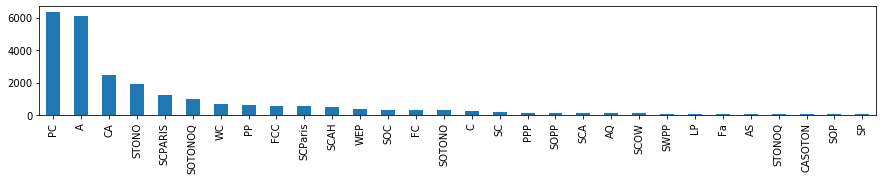

In [43]:
cnts = pd_train_clean.ticket_type.value_counts()
cnts.plot(kind='bar', figsize=(15, 2))
plt.show()

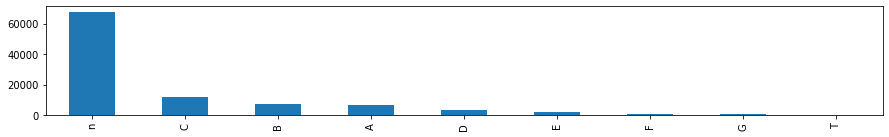

In [14]:
cnts = pd_train_clean.cabin_id.value_counts()
cnts.plot(kind='bar', figsize=(15, 2))
plt.show()